In [1]:
import env
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import wrangle
import os
import sys

In [2]:
# df=wrangle.wrangle()
df = pd.read_csv('sql_pull.csv')

In [3]:
# df.to_csv('sql_pull.csv')

In [4]:
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
0,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
1,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
3,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
4,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [5]:
df.date_time = pd.to_datetime(df.date_time)
df = df.set_index(df.date_time)
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [6]:
df.index.max(), df.index.min()

(Timestamp('2021-04-21 16:44:39'), Timestamp('2018-01-26 09:55:03'))

In [7]:
df[df.program_id ==3].cohort_name.value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562
Name: cohort_name, dtype: int64

program_id 3 is full stack java
4 is front end
2 is full stack java??

In [8]:
df.endpoint.sample(50)

date_time
2020-03-01 18:49:28                                         javascript-i
2019-09-24 08:34:47                  java-ii/object-oriented-programming
2019-08-29 16:42:33               html-css/css-ii/bootstrap-introduction
2019-11-20 11:43:44                          java-i/introduction-to-java
2018-06-22 06:46:47                                  mysql/clauses/limit
2018-07-29 13:23:00                                              java-ii
2018-04-25 09:42:59                                spring/extra-features
2020-08-06 10:18:31             1-fundamentals/modern-data-scientist.jpg
2019-07-03 08:22:46                                     jquery/selectors
2018-02-12 13:47:27                                     jquery/selectors
2020-09-14 16:44:48                  javascript-i/bom-and-dom/dom-events
2020-02-06 20:02:06             appendix/cli/4-navigating-the-filesystem
2019-11-19 20:43:14                                               jquery
2018-07-13 11:53:58                      

In [9]:
bayes = df[df.cohort_name =='Bayes']
curie = df[df.cohort_name =='Curie']
darden = df[df.cohort_name =='Darden']
easley = df[df.cohort_name =='Easley']
florence = df[df.cohort_name =='Florence']

In [10]:
print(bayes.shape)
print(curie.shape)
print(darden.shape)
print(easley.shape)
print(florence.shape)

(26538, 15)
(21582, 15)
(32015, 15)
(14715, 15)
(8562, 15)


In [11]:
# Get cohort counts
print(len(bayes.user_id.unique()))
print(len(curie.user_id.unique()))
print(len(darden.user_id.unique()))
print(len(easley.user_id.unique()))
print(len(florence.user_id.unique()))

23
21
29
17
21


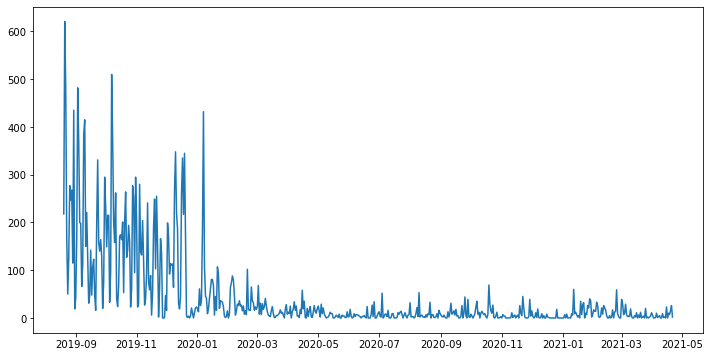

In [12]:
fig, ax =plt.subplots(figsize=(12,6))

x = bayes.date
y = bayes['endpoint'].resample('d').count()

ax.plot(y)

plt.show()

In [13]:
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [14]:
df.groupby(by=['program','endpoint']).agg('count').user_id

program       endpoint                        
data_science  %20https://github.com/RaulCPena        1
              ,%20https://github.com/RaulCPena       1
              .gitignore                             1
              /                                   8358
              1-fundamentals                        10
                                                  ... 
php_web_dev   web-design/ui/color                   27
              web-design/ui/typography              29
              web-design/ui/visuals                 26
              web-design/ux/layout                  29
              web-design/ux/purpose                 29
Name: user_id, Length: 3309, dtype: int64

In [15]:
# temp = df[df.endpoint != '/']

In [16]:
# temp.groupby(by=['program']).endpoint.value_counts()

In [17]:
# temp.endpoint.value_counts().head(10)

In [24]:
df.endpoint.str.endswith('/')

date_time
2018-01-26 09:55:03     True
2018-01-26 09:56:02    False
2018-01-26 09:56:05    False
2018-01-26 09:56:06    False
2018-01-26 10:40:15    False
                       ...  
2021-04-21 09:09:42    False
2021-04-21 09:29:08    False
2021-04-21 10:05:39    False
2021-04-21 11:01:19    False
2021-04-21 11:01:23    False
Name: endpoint, Length: 847330, dtype: object

In [26]:
temp = df.copy()
temp['drop_me'] = temp.endpoint.str.contains('.jpg|.svg|.json|.jpeg', regex=True) | temp.endpoint.str.endswith('/')
temp.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev,True
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev,False
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev,False
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev,False


In [27]:
# temp[temp.drop_me == False].endpoint.value_counts()
temp = temp[temp.drop_me == False]

In [28]:
temp.endpoint.value_counts()

javascript-i           18203
toc                    17591
java-iii               13166
html-css               13127
java-ii                12177
                       ...  
About_NLP                  1
query/personal-site        1
extra-challenges           1
capstone/index             1
learn-to-code              1
Name: endpoint, Length: 2147, dtype: int64

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [29]:
temp.program.value_counts().index

Index(['java_web_dev', 'data_science', 'php_web_dev', 'front_end_web_dev'], dtype='object')

In [30]:
programs = ['java_web_dev', 'data_science', 'php_web_dev', 'front_end_web_dev']
for x in programs:
    print(f'The top ten endoints for {x} are {temp[temp.program == x].endpoint.value_counts().head(10)}')



# temp[temp.program == 'data_science'].endpoint.value_counts().head(10)

The top ten endoints for java_web_dev are javascript-i     17457
toc              17428
java-iii         12683
html-css         12569
java-ii          11719
spring           11376
jquery           10693
mysql            10318
java-i           10016
javascript-ii     9861
Name: endpoint, dtype: int64
The top ten endoints for data_science are classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
anomaly-detection/overview                   804
10-anomaly-detection/1-overview              751
3-sql/1-mysql-overview                       707
stats/compare-means                          668
python/data-types-and-variables              667
Name: endpoint, dtype: int64
The top ten endoints for php_web_dev are index.html       1011
javascript-i      736
html-css          542
spring            501
java-iii 

- is there a difference between javascript-i and java-i? maybe renamed at some point?
- 

In [32]:
temp[temp.program == 'data_science'].endpoint.value_counts().head(10)

classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
anomaly-detection/overview                   804
10-anomaly-detection/1-overview              751
3-sql/1-mysql-overview                       707
stats/compare-means                          668
python/data-types-and-variables              667
Name: endpoint, dtype: int64

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


In [39]:
temp.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev,False
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev,False
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev,False
2018-01-26 11:26:13,2018-01-26 11:26:13,2018-01-26,11:26:13,java-i,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 11:26:13,720 days,php_web_dev,False


In [51]:
for x in programs:
    sns.barplot(data=temp, x=temp.endpoint)

TypeError: Horizontal orientation requires numeric `x` variable.

In [45]:
for x in programs:
    # Plot of top 10 lessons across all cohorts:
    sns.barplot(data=temp,
        x="endpoint", y=temp.endpoint.head(10))
#     plt.title('Top 20 Lessons Across All Cohorts')
#     plt.xlabel('Access Count')
#     plt.ylabel('Lesson')
    plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.